<a href="https://colab.research.google.com/github/joycemsm/fashion-store-analysis/blob/main/sales_analysis_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion Store - Sales Analysis (Python)**

This notebook presents sales analysis of the Fashion Store dataset using Python.

It complements the SQL work and showcases exploratory data analysis, basic visualizations, and business insights.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
sales = pd.read_csv('/dataset_fashion_store_sales.csv')
campaigns = pd.read_csv('/dataset_fashion_store_campaigns.csv')
channels = pd.read_csv('/dataset_fashion_store_channels.csv')
customers = pd.read_csv('/dataset_fashion_store_customers.csv')
products = pd.read_csv('/dataset_fashion_store_products.csv')
salesitems = pd.read_csv('/dataset_fashion_store_salesitems.csv')
stock = pd.read_csv('/dataset_fashion_store_stock.csv')

#  1. **Dataset Overview**

Before performing any analysis, it is important to understand the structure and contents of the datasets.

In [ ]:
# Check structure of each dataset
print("sales:")
print(sales.info())

print("\n sales_items:")
print(salesitems.info())

print("\n products:")
print(products.info())

sales:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 905 entries, 0 to 904
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sale_id       905 non-null    int64  
 1   channel       905 non-null    object 
 2   discounted    905 non-null    int64  
 3   total_amount  905 non-null    float64
 4   sale_date     905 non-null    object 
 5   customer_id   905 non-null    int64  
 6   country       905 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 49.6+ KB
None

 sales_items:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            2253 non-null   int64  
 1   sale_id            2253 non-null   int64  
 2   product_id         2253 non-null   int64  
 3   quantity           2253 non-null   int64  
 4   original_price     

## **Data Cleaning**

In this step, we applied basic data cleaning to prepare the dataset for analysis:

In [ ]:
# Convert date
salesitems['sale_date'] = pd.to_datetime(salesitems['sale_date'])

# Ensure it is string
salesitems['discount_percent'] = salesitems['discount_percent'].astype(str)

# Remove the % and convert to float
salesitems['discount_percent'] = salesitems['discount_percent'].str.replace('%', '').astype(float)

* I converted the sale_date column from string to datetime format, allowing time-based filtering and grouping (e.g., by month).

* The discount_percent column originally contained percentage signs ("%") as strings.

* I first ensured the column was of string type, then removed the % symbol and converted it to numeric (float).

* This allows me to use this column in calculations, such as analyzing average discounts or filtering by discount range.

In [20]:
salesitems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2253 entries, 0 to 2252
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   item_id            2253 non-null   int64  
 1   sale_id            2253 non-null   int64  
 2   product_id         2253 non-null   int64  
 3   quantity           2253 non-null   int64  
 4   original_price     2253 non-null   float64
 5   unit_price         2253 non-null   float64
 6   discount_applied   2253 non-null   float64
 7   discount_percent   2253 non-null   object 
 8   discounted         2253 non-null   int64  
 9   item_total         2253 non-null   float64
 10  sale_date          2253 non-null   object 
 11  channel            2253 non-null   object 
 12  channel_campaigns  2253 non-null   object 
dtypes: float64(4), int64(5), object(4)
memory usage: 228.9+ KB


## **Checking for Missing Values**

In this step, we checked all datasets (sales, sales_items, and products) for missing values using the .isnull().sum() method. This is an essential part of the data cleaning process to ensure data completeness and reliability before analysis.  

* Result: No missing values were found in any of the datasets, which means the data is complete and ready for analysis.

In [19]:
print("Missing values in sales:")
print(sales.isnull().sum())

print("\n Missing values ins sales_items:")
print(salesitems.isnull().sum())

print("\n Missing values in products:")
print(products.isnull().sum())

Missing values in sales:
sale_id         0
channel         0
discounted      0
total_amount    0
sale_date       0
customer_id     0
country         0
dtype: int64

 Missing values ins sales_items:
item_id              0
sale_id              0
product_id           0
quantity             0
original_price       0
unit_price           0
discount_applied     0
discount_percent     0
discounted           0
item_total           0
sale_date            0
channel              0
channel_campaigns    0
dtype: int64

 Missing values in products:
product_id       0
product_name     0
category         0
brand            0
color            0
size             0
catalog_price    0
cost_price       0
gender           0
dtype: int64


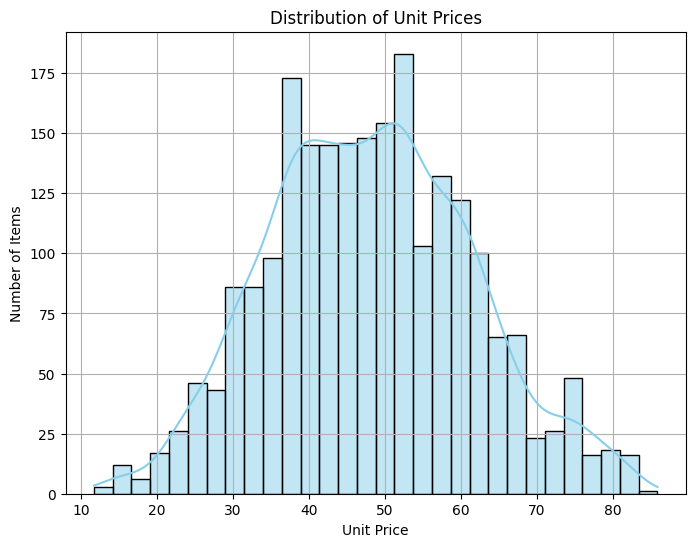

In [18]:
# Distribution of Unit Price
plt.figure(figsize=(8, 6))
sns.histplot(salesitems['unit_price'], bins=30, kde=True, color='skyblue')
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Number of Items')
plt.grid(True)
plt.show()

### Insights

* Most products are priced between €35 and €60, peaking around €50.
* The distribution is slightly right-skewed, with fewer high-priced items.
* This suggests a mid-range pricing strategy, focused on accessibility.
* Helps me understand product positioning and guide pricing decisions.

---

# **3. Sales Insignts**

In this section, we explore key business questions using Python.

Unlike the SQL analysis, here we focus on leveraging Python’s flexibility to uncover new insights from the data, including the effectiveness of discounts, customer purchase behavior, and sales distribution across time.

Each analysis is introduced with a clear business question, followed by code, visualizations, and interpretations.

## **Do discounts actually lead to higher sales volume?**

This question is important because it helps you understand whether promotional campaigns are generating more sales or just reducing margins with no practical effect.

In [ ]:
# Group data by whether the items had a discounte (0 = no, 1 = yes)
# And calculate the average quantity sold per group

discount_effect = salesitems.groupby('discounted')['quantity'].mean().reset_index()

# Rename columns for better readability
discount_effect.columns = ['Disconted', 'Avarage Quantity Sold']

# Display the result
print(discount_effect)

   Disconted  Avarage Quantity Sold
0          0               2.994584
1          1               2.851351


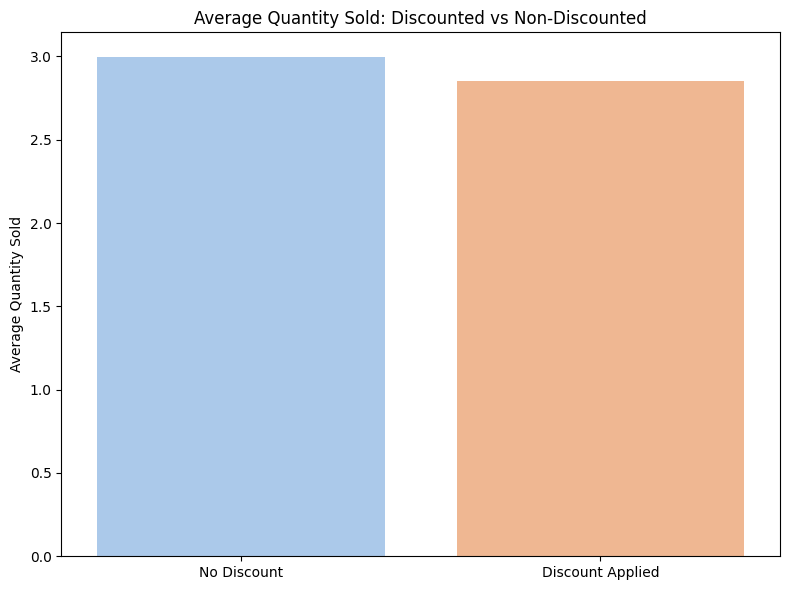

In [ ]:
# Step 1: Group by 'discounted' column and calculate average quantity sold
discount_effect = salesitems.groupby('discounted')[['quantity']].mean().reset_index()
discount_effect.columns = ['Discounted', 'Average Quantity Sold']

# Step 2: Create a new column with descriptive labels for discounts
discount_effect['Discount Label'] = discount_effect['Discounted'].map({
    0: 'No Discount',
    1: 'Discount Applied'
})

# Step 3: Create the bar plot
plt.figure(figsize=(8, 6))
sns.barplot(
    x='Discount Label',
    y='Average Quantity Sold',
    data=discount_effect,
    palette='pastel'
)

# Step 4: Add titles and labels
plt.title('Average Quantity Sold: Discounted vs Non-Discounted')
plt.xlabel('')
plt.ylabel('Average Quantity Sold')
plt.tight_layout()
plt.show()

###Insights


I analyzed whether applying discounts increases the average number of items sold.

The results show that:

* Products without discount sold an average of 2.99 units

* Products with discount sold an average of 2.85 units

This indicates that discounts did not significantly increase the quantity sold.
In fact, items without discounts slightly outperformed in terms of average quantity.

## **Which sales channels generate the highest average order value?**

I want to compare the average amount that customers spend in each sales channel,for example: Online, In-store, Social Media, etc.

In [ ]:
# Group by channel and calculate the average total order value
channel_avg_order_value = sales.groupby('channel')['total_amount'].mean().reset_index()

#Rename collumns for clarity
channel_avg_order_value.columns = ['Sales Channel', 'Average Order Value']

#Sort in descending order for better visibility
channel_avg_order_value = channel_avg_order_value.sort_values(by='Average Order Value', ascending=False)

#Display the result
channel_avg_order_value


,Sales Channel,Average Order Value
1,E-commerce,362.950782
0,App Mobile,353.150324


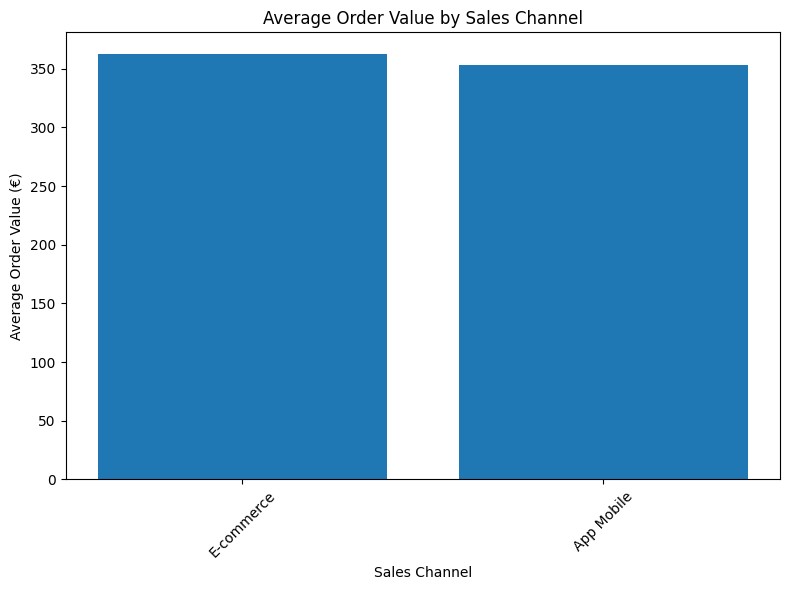

In [ ]:
# Plot bar chart
plt.figure(figsize=(8, 6))
plt.bar(channel_avg_order_value['Sales Channel'], channel_avg_order_value['Average Order Value'])
plt.title('Average Order Value by Sales Channel')
plt.ylabel('Average Order Value (€)')
plt.xlabel('Sales Channel')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Insights

* The E-commerce channel has a slightly higher Average Order Value (AOV) compared to the Mobile App.

* Customers shopping via the website tend to spend approximately 9.80 more per order than those using the app.

* Although the difference is small, it might indicate different shopping behaviors or product preferences between platforms.

## **What Makes a Sale Bigger or Smaller?**

In this step, I'm trying to understand which numerical variables have the strongest impact on the total sale amount.

To do this, I calculate something called correlation, which tells me how strongly two variables are related. The result is a number between -1 and 1:

* +1 means a strong positive relationship (both values increase together)

* 0 means no relationship

* -1 means a strong negative relationship (as one increases, the other decreases)

After calculating the correlations, I use a heatmap (a visual correlation matrix) to make the results easier to read.

Darker or warmer colors represent stronger relationships

Lighter or cooler colors show weaker ones

This helps me quickly spot which factors like discounts, unit price, or quantity are truly influencing the final value of each sale.

In [ ]:
# Step 1: Aggregate item-level info per sale
sales_item_summary = salesitems.groupby('sale_id').agg({
    'quantity': 'sum',
    'item_total': 'sum',
    'unit_price': 'mean',
    'original_price': 'mean'
}).reset_index()

# Step 2: Merge with sales
sales_extended = pd.merge(sales, sales_item_summary, on='sale_id')

# Step 3: Correlation with total_amount
correlation = sales_extended.corr(numeric_only=True)['total_amount'].sort_values(ascending=False)
print(correlation)

total_amount      1.000000
item_total        1.000000
quantity          0.869851
unit_price        0.464469
original_price    0.414507
customer_id      -0.034120
discounted       -0.204242
sale_id          -0.451942
Name: total_amount, dtype: float64


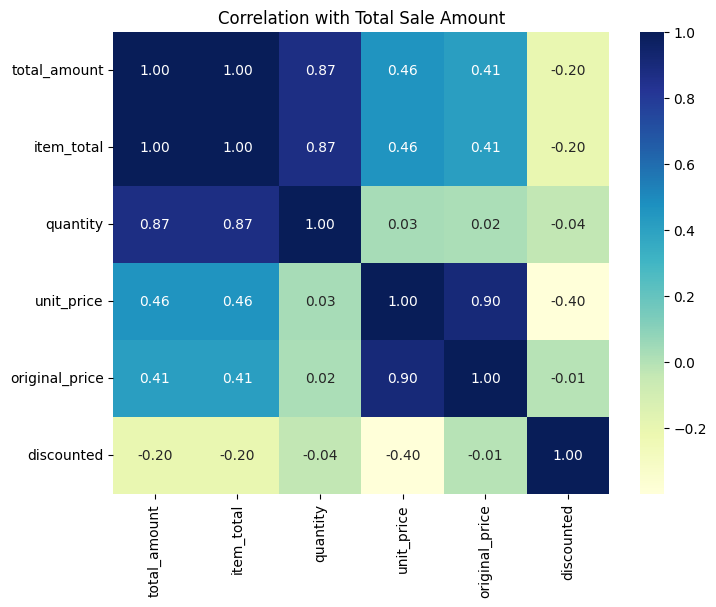

In [ ]:
# Filter only relevant numeric columns
cols_to_plot = ['total_amount', 'item_total', 'quantity', 'unit_price', 'original_price', 'discounted']
corr_matrix = sales_extended[cols_to_plot].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title("Correlation with Total Sale Amount")
plt.show()

###Insights


By analyzing the correlation matrix, I was able to identify which factors have the strongest influence on the total sale amount.

* Quantity sold shows a strong positive correlation (0.87) with the total amount. This confirms an intuitive insight: the more items a customer buys, the higher the final sale value.

* Unit price and original price also contribute positively, though with a moderate correlation (0.46 and 0.41 respectively). This suggests that price variations do impact revenue, but not as strongly as quantity.

* Discounted has a negative correlation (-0.20), indicating that applying discounts tends to slightly reduce the total sale amount — possibly because discounted products may be cheaper or customers buy fewer units when discounts are offered.

From a business perspective, this analysis helps guide decisions such as:

* Promoting strategies that increase basket size (quantity)

* Carefully evaluating the impact of discounts on revenue

* Testing price sensitivity across product categories

## **Which Products Are the Most Financially Valuable?**

In this analysis, I looked beyond just profit margin. I combined two key perspectives:

* Profit Margin (%): How much I earn per unit sold.
* Total Revenue per Product: How much money each product actually brings into the business overall.


In [ ]:
# Calculate percentage profit margin
products['profit_margin_percent'] = ((products['catalog_price'] - products['cost_price']) / products['catalog_price']) * 100

# Round to 2 decimal places
products['profit_margin_percent'] = products['profit_margin_percent'].round(2)

# Select top 15 most profitable products by percentage
top_profit_percent = products[['product_id', 'product_name', 'profit_margin_percent']].sort_values(by='profit_margin_percent', ascending=False).head(15)

# Display the table
top_profit_percent

,product_id,product_name,profit_margin_percent
208,209,Polished Ribbed Shoes,59.86
72,73,Soft Boxy Set,59.83
128,129,Classic Linen Trousers,59.79
205,206,Vintage Silk Trousers,59.72
407,408,Elegant High-Waist Tee,59.67
456,457,Bold Crew Tee,59.66
470,471,T-Shirts Drop 1,59.63
332,333,Relaxed Silk Trousers,59.58
244,245,Relaxed Cotton Dress,59.53
171,172,Vintage Crew Shoes,59.50


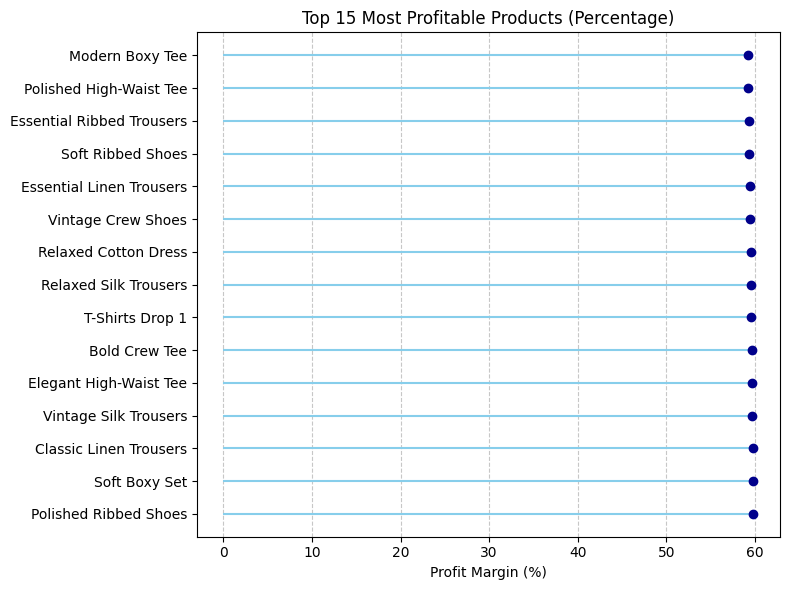

In [ ]:
# Plot
plt.figure(figsize=(8, 6))
plt.hlines(y=top_profit_percent['product_name'], xmin=0, xmax=top_profit_percent['profit_margin_percent'], color='skyblue')
plt.plot(top_profit_percent['profit_margin_percent'], top_profit_percent['product_name'], "o", color='darkblue')

plt.xlabel('Profit Margin (%)')
plt.title('Top 15 Most Profitable Products (Percentage)')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# Group sales items by product and calculate total quantity and total revenue
product_revenue = salesitems.groupby('product_id').agg({
    'quantity': 'sum',
    'item_total': 'sum'
}).reset_index()

# Merge with product names
product_revenue = product_revenue.merge(products[['product_id', 'product_name']], on='product_id')

# Reorder columns to have 'item_total' at the end
product_revenue = product_revenue[['product_id', 'product_name', 'quantity', 'item_total']]

# Sort by highest revenue
product_revenue = product_revenue.sort_values(by='item_total', ascending=False)

# Round revenue values and reset index
product_revenue['item_total'] = product_revenue['item_total'].round(2)
product_revenue.reset_index(drop=True, inplace=True)

# Display top 15 products
product_revenue.head(15)


,product_id,product_name,quantity,item_total
0,310,Relaxed Ribbed Trousers,36,2379.30
1,60,Modern Cotton Tee,25,1919.95
2,116,Modern High-Waist Trousers,26,1907.66
3,469,Dresses Drop 1,29,1858.32
4,459,Bold High-Waist Dress,24,1804.08
5,224,Relaxed Linen Dress,22,1658.80
6,297,Essential High-Waist Shoes,25,1603.18
7,307,Essential Crew Tee,24,1598.19
8,239,Polished Wrap Trousers,25,1594.37
9,10,Soft Ribbed Trousers,20,1594.00


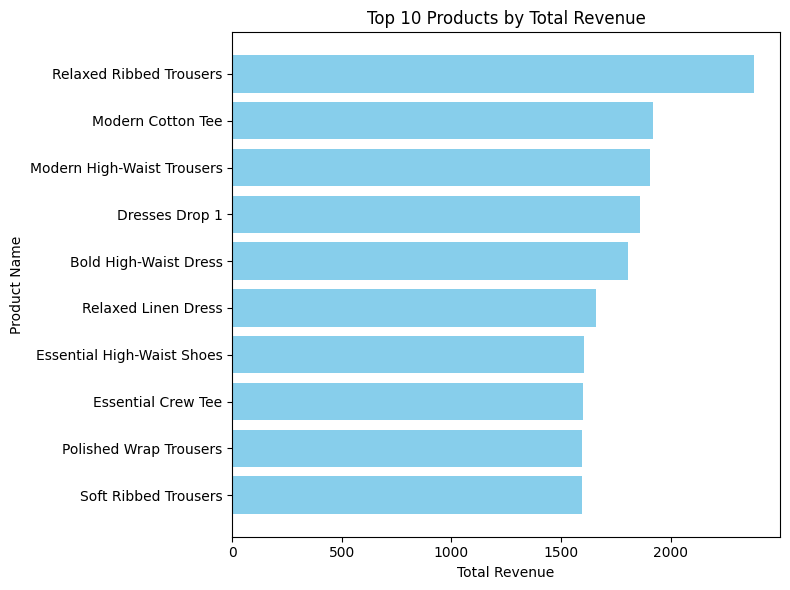

In [ ]:
# Selecionar os 10 produtos com maior receita
top_products = product_revenue.head(10)

# Criar o gráfico
plt.figure(figsize=(8, 6))
plt.barh(top_products['product_name'], top_products['item_total'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Product Name')
plt.title('Top 10 Products by Total Revenue')
plt.gca().invert_yaxis()  # Inverter a ordem para mostrar o maior no topo
plt.tight_layout()
plt.show()

### Insights

When I analyzed the products with the highest profit margin percentages, I noticed that many of them had margins above 59%, which is excellent in terms of profitability per unit. However, when I cross-checked this with the products generating the highest total revenue (item_total), I found that the most profitable products are not always the ones bringing in the most money to the business.

For instance, products like “Polished Ribbed Shoes” and “Soft Boxy Set” stood out in terms of margin, but they didn't appear among the top sellers by revenue.

On the other hand, products like “Relaxed Ribbed Trousers” and “Modern Cotton Tee” didn't lead in margin percentage but generated the highest total revenue thanks to their larger sales volume.

This insight showed me that the business needs a strategic balance:

I should prioritize high-margin products when planning campaigns that aim for profitability.

I should also focus on high-revenue products by ensuring they are always available in stock and supported by volume strategies, as they are responsible for driving cash flow.